In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets  import make_blobs
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('mall_customers.csv')

In [4]:
data.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:
datasubset=data.loc[:,["age","annual_income"]]

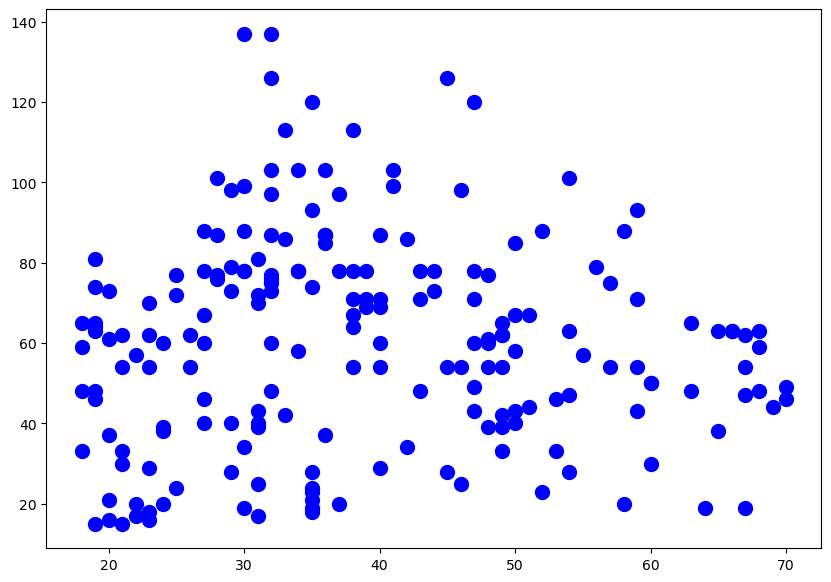

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(datasubset[["age"]],datasubset[["annual_income"]],s=100,c='blue')

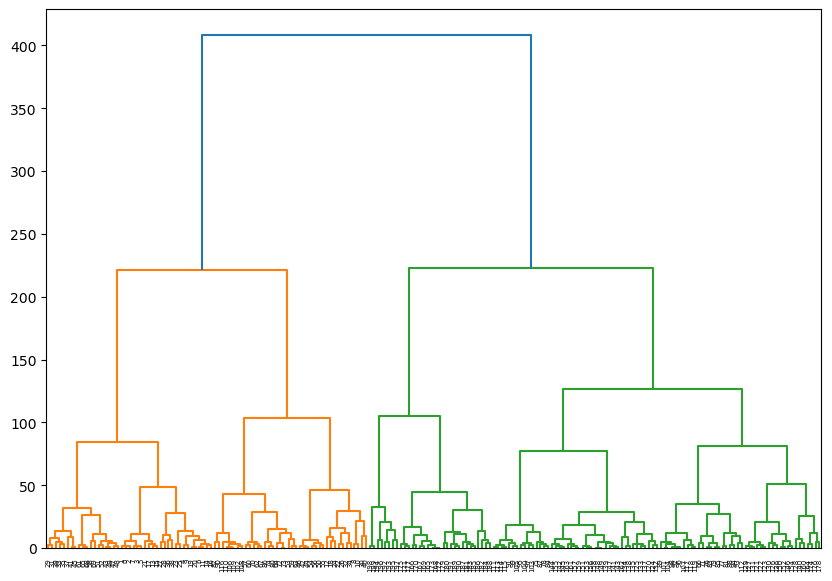

In [44]:
plt.figure(figsize=(10,7))
dendrogram=sch.dendrogram(sch.linkage(datasubset,method='ward'))

In [54]:

cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cl=cluster.fit_predict(datasubset)

from sklearn.metrics import silhouette_score
silhouette_score(datasubset,cl)
X=datasubset.values

C:\Users\chafl\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


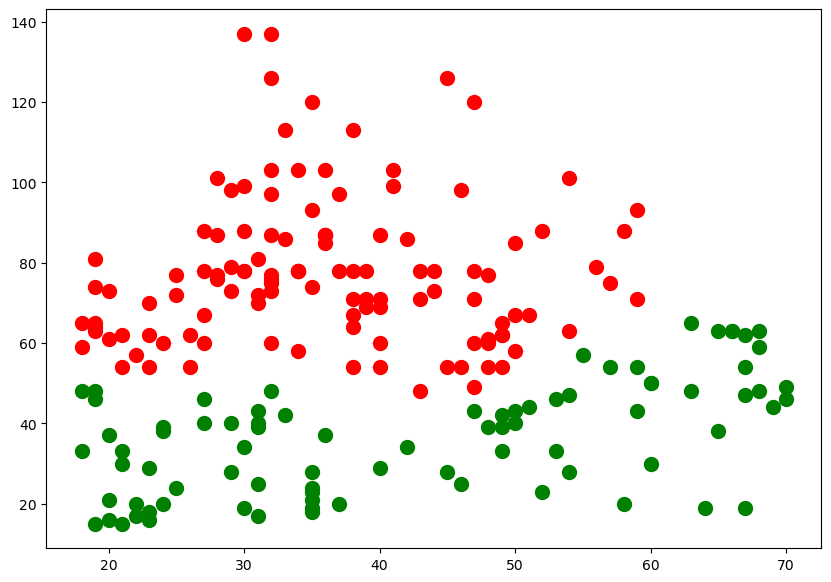

In [58]:
plt.figure(figsize=(10,7))
plt.scatter(X[cl==0,0],X[cl==0,1],s=100,c='red',label='1')
plt.scatter(X[cl==1,0],X[cl==1,1],s=100,c='green',label='2')

plt.scatter(X[cl==2,0],X[cl==2,1],s=100,c='yellow',label='3')
plt.scatter(X[cl==3,0],X[cl==3,1],s=100,c='blue',label='4')

Linkage: single, Silhouette Score: 0.8469881221532085


C:\Users\chafl\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


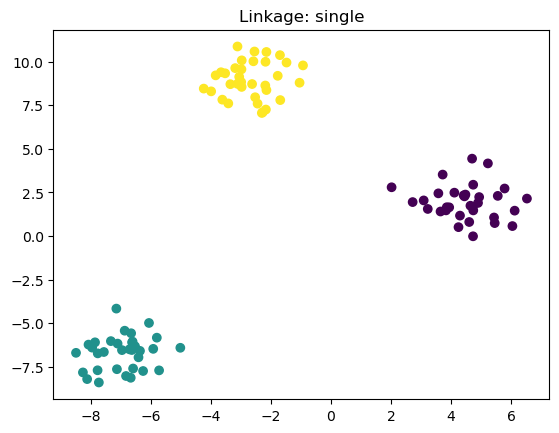

Linkage: complete, Silhouette Score: 0.8469881221532085


C:\Users\chafl\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


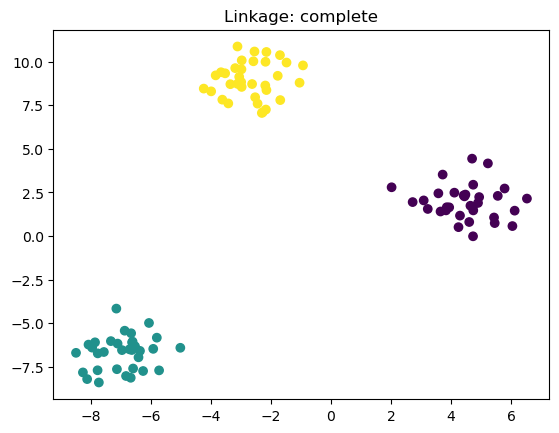

Linkage: average, Silhouette Score: 0.8469881221532085


C:\Users\chafl\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


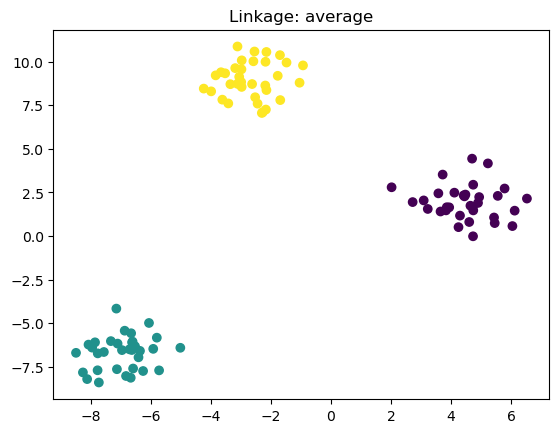

C:\Users\chafl\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Linkage: ward, Silhouette Score: 0.8469881221532085


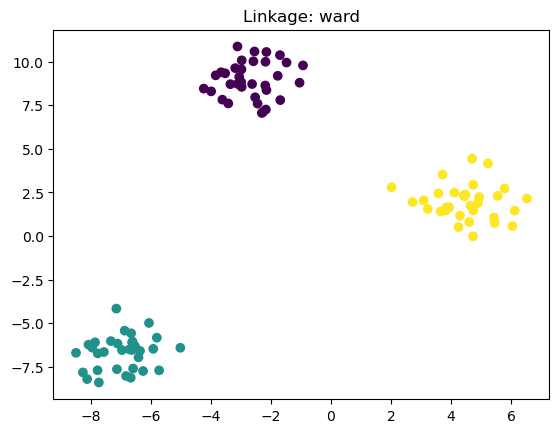

In [8]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Create a sample dataset
data, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)
datasubset = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# Different linkage methods
linkages = ['single', 'complete', 'average', 'ward']

for linkage in linkages:
    # Create and fit the AgglomerativeClustering model
    cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=linkage)
    cl = cluster.fit_predict(datasubset)

    # Calculate the silhouette score
    score = silhouette_score(datasubset, cl)
    print(f'Linkage: {linkage}, Silhouette Score: {score}')

    # Plot the clusters
    plt.figure()
    plt.scatter(datasubset['Feature1'], datasubset['Feature2'], c=cl, cmap='viridis')
    plt.title(f'Linkage: {linkage}')
    plt.show()
